<a href="https://colab.research.google.com/github/CheboluGayatri/fmml_lab_projects/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

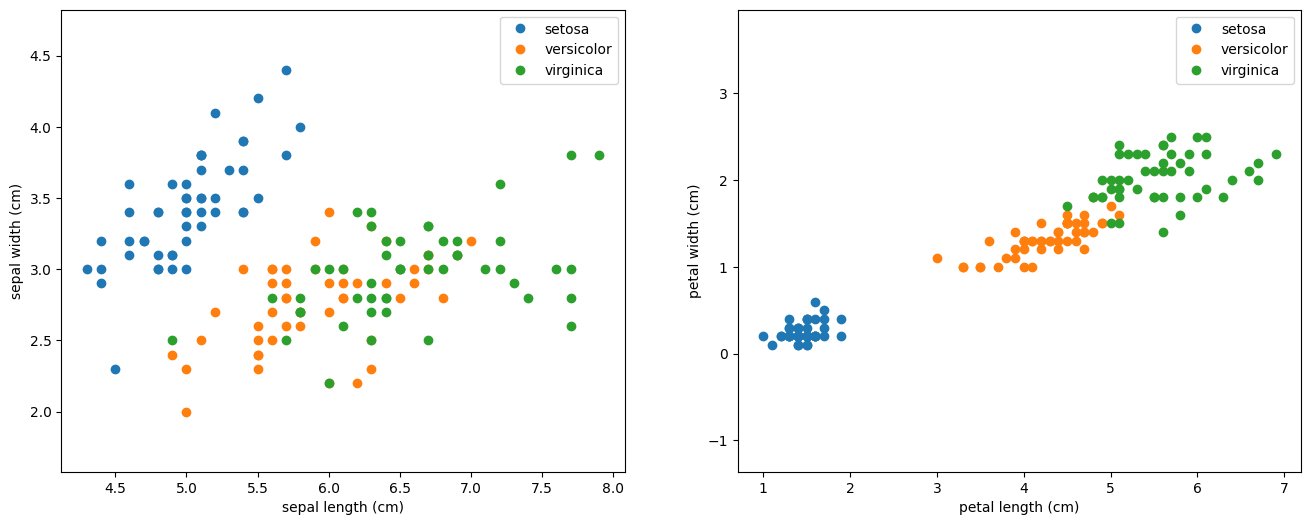

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 283.87it/s]


# Plot training progress

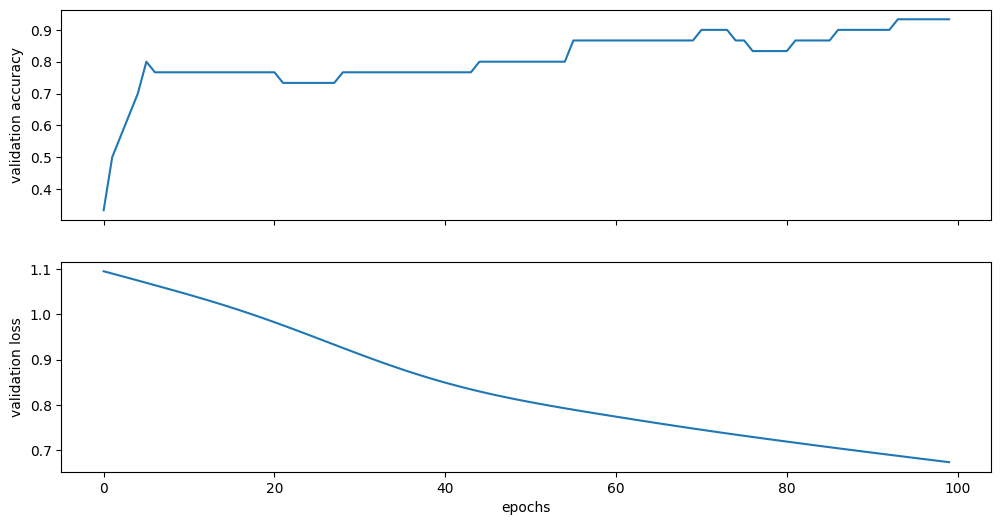

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**Answer1**Increased Model Complexity: Adding more hidden layers increases the complexity of the model. This can allow the network to learn more intricate patterns and relationships in the data, potentially leading to improved performance, especially for complex tasks.
Feature Representation: Each hidden layer learns to represent features at different levels of abstraction. By adding more layers, the network can learn hierarchical representations of the input data, where higher layers capture more abstract features built upon lower-level representations.
Risk of Overfitting: Increasing the number of hidden layers may also increase the risk of overfitting, especially if the model becomes too complex relative to the amount of training data available. Overfitting occurs when the model learns to memorize the training data instead of generalizing well to unseen data.
Training Time and Computational Cost: Deeper networks with more hidden layers generally require more training time and computational resources to converge. This is because there are more parameters to optimize, and deeper networks may suffer from vanishing or exploding gradients, which can make training more difficult.
Hyperparameter Tuning: Adding hidden layers introduces additional hyperparameters that need to be tuned, such as the number of units in each layer, the activation functions used, and the learning rate. Finding the optimal configuration can require more experimentation and computational resources.
Data Requirements: Deeper networks often require larger amounts of data to train effectively. With insufficient data, deeper models may struggle to generalize well and may even perform worse than shallower networks.
Interpretability: Deeper networks can sometimes be harder to interpret and understand compared to shallower networks. The representations learned in intermediate layers may be more abstract and less intuitive to interpret.


**Answer2**Model Capacity: The number of neurons in the hidden layer(s) determines the capacity or complexity of the model. More neurons allow the network to learn more intricate patterns and relationships in the data. However, too few neurons may result in underfitting, where the model cannot capture the complexity of the data.
Overfitting vs. Underfitting: Increasing the number of neurons can increase the risk of overfitting, especially if the model becomes too complex relative to the amount of training data available. Conversely, having too few neurons can lead to underfitting, where the model fails to capture important patterns in the data.
Computational Efficiency: More neurons generally require more computational resources during training and inference. Larger networks may take longer to train and require more memory, so there's a trade-off between model capacity and computational efficiency.
Generalization: The number of neurons can affect the model's ability to generalize to unseen data. A model with too many neurons may memorize the training data and perform poorly on new, unseen examples, while a model with too few neurons may fail to generalize well.
Hyperparameter Tuning: The number of neurons is a hyperparameter that needs to be tuned during the model development process. It's often determined through experimentation and validation on a held-out dataset or through techniques like cross-validation.
Guidelines: There's no one-size-fits-all rule for choosing the number of neurons in a hidden layer. It depends on factors like the complexity of the task, the amount of available data, and computational constraints. In practice, it's common to start with a moderate number of neurons and adjust based on empirical performance.
Architecture Design: In deep learning architectures, it's common to use multiple hidden layers with varying numbers of neurons. The number of neurons in each layer can be adjusted independently based on the desired level of abstraction and complexity.


**Answer3**
ReLU (Rectified Linear Unit):
f(x)=max(0,x)
Pros: Simple and computationally efficient. It helps alleviate the vanishing gradient problem by allowing gradients to flow during backpropagation.
Cons: It can suffer from the "dying ReLU" problem, where neurons get stuck in the zero region and stop learning.
Sigmoid:

Pros: Outputs are in the range (0, 1), which can be interpreted as probabilities. It's useful in binary classification tasks.
Cons: It suffers from the vanishing gradient problem, especially for deep networks. It's computationally more expensive compared to ReLU.
Tanh (Hyperbolic Tangent):

Pros: Outputs are in the range (-1, 1), making it zero-centered and thus sometimes easier to optimize than sigmoid.
Cons: It still suffers from the vanishing gradient problem for deep networks.
Leaky ReLU
otherwise
α is a small constant (e.g., 0.01).
Pros: Addresses the dying ReLU problem by allowing a small gradient when the input is negative.
Cons: Adds a hyperparameter (
𝛼
α) to tune.
ELU
otherwise
α is a small constant (e.g., 1.0).
Pros: Similar to Leaky ReLU but has an output closer to zero for negative inputs, which may help learning.
Cons: Computationally more expensive due to the exponential function.
N is the number of classes.
Pros: Outputs represent probabilities over multiple classes, making it suitable for multi-class classification tasks.
Cons: Sensitive to large input values (numerical stability issues).